In [ ]:
import keras
import keras.utils
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import utils as np_utils

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten,Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
import collections
from matplotlib import pyplot as plt

import cv2
import os
import shutil 
import math
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model


# Model architecture: MLP
class SimpleMLP:
    @staticmethod
    def build1():
        # 82.18
        model = Sequential() 
        model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(66,66,3)) )
        model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(rate=0.25))
        model.add(Flatten())
        model.add(Dense(units=64, activation='relu'))
        model.add(Dropout(rate=0.25))
        model.add(Dense(units=5, activation='sigmoid'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
        return model
    @staticmethod
    def build2():
        # 87
        model = Sequential() 
        model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(66,66,3)) )
        model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))       
        model.add(BatchNormalization())      
        model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(rate=0.25))
        model.add(Flatten())
        model.add(Dense(units=256, activation='relu'))
        model.add(Dense(units=128, activation='relu'))
        model.add(Dropout(rate=0.25))
        model.add(Dense(units=5, activation='sigmoid'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
        #model.summary()
        
        return model
    @staticmethod
    def build3():
        # 88.46
        model = Sequential() 
        model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(66,66,3)) )
        model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(BatchNormalization())
        model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(rate=0.25))
        model.add(Flatten())
        model.add(Dense(units=256, activation='relu'))
        model.add(Dense(units=128, activation='relu'))
        model.add(Dropout(rate=0.25))
        model.add(Dense(units=5, activation='sigmoid'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
        #model.summary()
        
        return model

from keras.utils.vis_utils import plot_model
model=SimpleMLP().build1()
model.summary()
table=pd.DataFrame(columns=["Name","Type","Shape","Parameters"])
for layer in model.layers:
    table = table.append({"Name":layer.name, "Type": layer.__class__.__name__,"Shape":layer.output_shape, "Parameters":layer.count_params()}, ignore_index=True)
# table
table.to_csv('model1.csv', index=False, encoding='utf-8')
# plot_model(model, to_file='model_cnn_3_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 conv2d_45 (Conv2D)          (None, 62, 62, 32)        4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 128)     

In [ ]:
!pip install keras_visualizer

In [ ]:
from keras import models, layers  
from keras_visualizer import visualizer 
import visualkeras
model=SimpleMLP().build()
visualizer(model, format='png', view=True)

In [ ]:
!pip install gdown==3.6.0
my_file_id = "1QaQZ6rYs3bl7yExVUgSvgT9IdoZ9zfv3"
!gdown https://drive.google.com/uc?id={my_file_id}

In [ ]:
!unzip '/content/client test.zip'

In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_data = test_datagen.flow_from_directory(directory= "/content/test", target_size=(66, 66), batch_size=10, class_mode = 'categorical', shuffle=False)

Found 685 images belonging to 5 classes.


In [ ]:
print(type(test_data))

<class 'keras.preprocessing.image.DirectoryIterator'>


In [ ]:
model=load_model('/content/82 point 18.h5')

In [ ]:
pred=model.predict_generator(test_data,verbose=1,steps=685/10)

68/68 [==============================] - 3s 35ms/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (test_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
labels = (test_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
trueClass = test_data.classes[test_data.index_array]
true_labels = [labels[k] for k in trueClass]

In [ ]:
filenames=test_data.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})

In [ ]:
!pip install -q scikit-plot
import scikitplot as skplt
import pickle
from itertools import cycle
from scipy import interp

In [ ]:
def plot_confusion_matrix(clf, pred_test, y_test):
    pred_test=pd.DataFrame(pred_test)
    skplt.metrics.plot_confusion_matrix(
        y_test, 
        pred_test,
        figsize=(7,4),
        title='Confusion Matrix',
        title_fontsize='18',
        text_fontsize='16',
        cmap='Blues'
        )


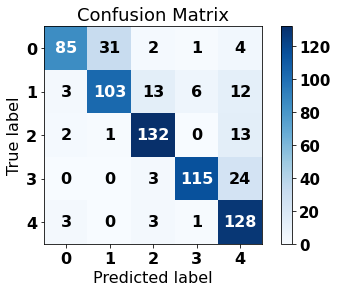

In [ ]:
y=trueClass
y_pred=predicted_class_indices
plot_confusion_matrix(model, y_pred, y)

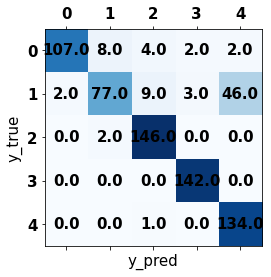

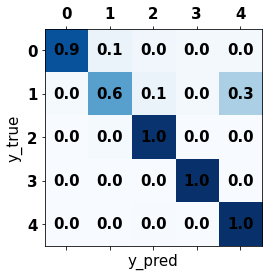

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_cm(data):
   fig, ax = plt.subplots()
   ax.matshow(data, cmap='Blues')
   for (i, j), z in np.ndenumerate(data):
       ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
   plt.figsize=(15,15)
   plt.title_fontsize='18'
   plt.text_fontsize='16'
   plt.xlabel("y_pred")
   plt.ylabel("y_true")
   plt.show()
y=trueClass
y_pred=predicted_class_indices
cm = confusion_matrix(y, y_pred)
plot_cm(cm)
cm = confusion_matrix(y, y_pred, normalize="true")
plot_cm(cm)

In [ ]:
from itertools import chain 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd

from sklearn.metrics import precision_score, recall_score, accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix
import seaborn as sns

def print_classification_report(model_name, predictions_l, labels_l):
    class_names = ['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediate']
    
    # Build confusion matrix
    font = {'family' : 'normal',
        'weight' : 'semibold',
        'size'   : 15}

    plt.rc('font', **font)
    cf_matrix = confusion_matrix(predictions_l, labels_l)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in class_names],
                        columns = [i for i in class_names])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True)
    plt.savefig(str(model_name)+'output.png')

    print("Classification report for CNN :\n%s\n"
          % (metrics.classification_report(labels_l, predictions_l)))
    
    prec_score = precision_score(labels_l,predictions_l, average='weighted') * 100
    rec_score = recall_score(labels_l, predictions_l, average='weighted') * 100
    f1score = f1_score(labels_l, predictions_l, average='weighted') * 100

    print(f'precision score was {prec_score:6.2f}%\nrecall score was {rec_score:6.2f}%')
    print(f'f1 score was {f1score:6.2f}%\n')

In [ ]:
print_classification_report('cnn', predictions, true_labels)

# **ROC AUC Curve**

In [ ]:
classes = test_data.class_indices
classes = list(classes.keys())
classes

['Dyskeratotic',
 'Koilocytotic',
 'Metaplastic',
 'Parabasal',
 'Superficial-Intermediate']

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from platform import python_version_tuple

if python_version_tuple()[0] == '3':
    xrange = range
    izip = zip
    imap = map
else:
    from itertools import izip, imap

import numpy as np

# ..
# other code as in question
# ..

X_test, y_test = izip(*(test_data[i] for i in xrange(len(test_data))))
X_test, y_test = np.vstack(X_test), np.vstack(y_test)

In [ ]:
len(X_test)

685

In [ ]:
len(y_test)

685

In [ ]:
y_test

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_pred_=lb.fit_transform(y_pred)
y_pred_

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

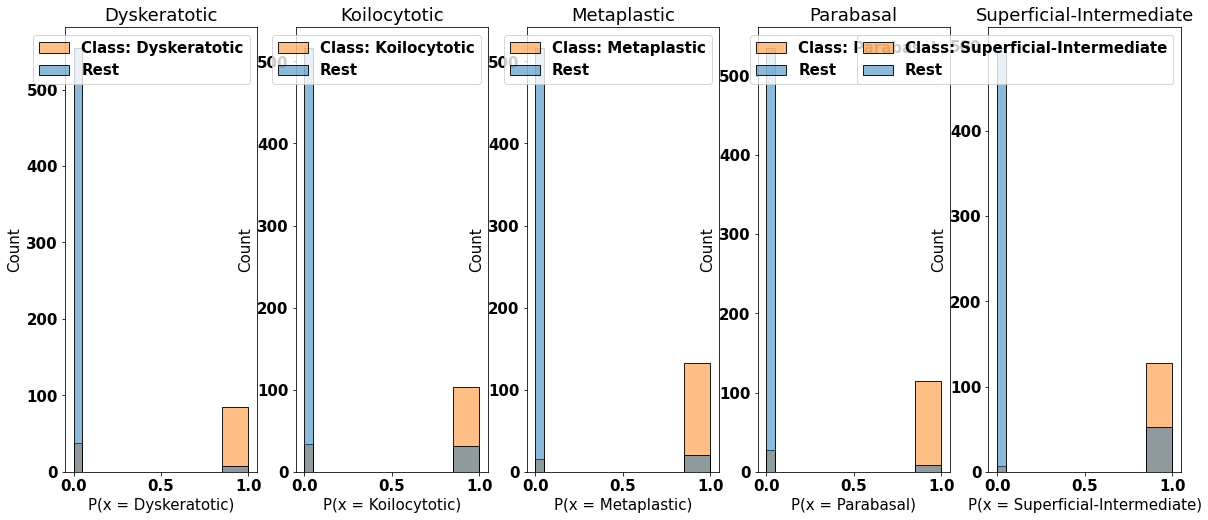

In [ ]:
results['actual_class'] = true_labels
plt.figure(figsize = (20, 18))
bins = [i/20 for i in range(18)] + [1]
for i in range(0,5):
    c=classes[i]
    df_aux = results
    df_aux['class'] = [1 if j == i else 0 for j in y]
    df_aux['prob'] = y_pred_[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 5, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")

In [ ]:
# def evaluate_model(model, generator, nBatches):
#     score = model.evaluate_generator(generator=generator,               # Generator yielding tuples
#                                      steps=generator.samples//nBatches, # number of steps (batches of samples) to yield from generator before stopping
#                                      max_queue_size=10,                 # maximum size for the generator queue
#                                      workers=0,                         # maximum number of processes to spin up when using process based threading
#                                      use_multiprocessing=False,         # whether to use process-based threading
#                                      verbose=0)
#     print(score)
#     print("loss: %.3f - acc: %.3f" % (score[0], score[1]))
# evaluate_model(model, test_data, 2)

# **ROC AUC Score**

In [ ]:
# Displays the ROC AUC for each class
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average = "micro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

print("ROC AUC score for each class")
# assuming your already have a list of actual_class and predicted_class from the logistic regression classifier
lr_roc_auc_multiclass = roc_auc_score_multiclass(y, predicted_class_indices)
print(lr_roc_auc_multiclass)

ROC AUC score for each class
{0: 0.8384110175621329, 1: 0.8467153284671534, 2: 0.9263928733202476, 3: 0.8975630949601847, 4: 0.9258922558922559}


In [ ]:
# Compares with sklearn (average only)
# "Macro" average = unweighted mean
roc_auc_score(y_test, y_pred_, labels = classes, multi_class = 'ovr', average = 'macro')

0.8869949140403948

# **ROC AUC Curve**

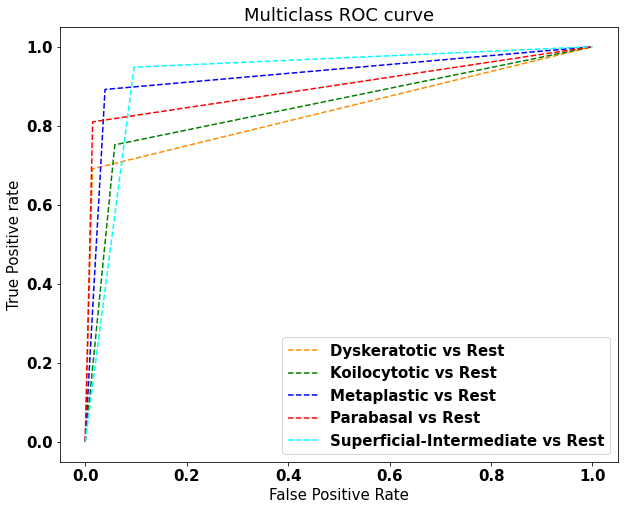

In [ ]:
#ovr

from sklearn.metrics import roc_curve

n_class = 5

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y, y_pred_[:,i], pos_label=i)

# plotting    
plt.figure(figsize = (10, 8))
plt.plot(fpr[0], tpr[0], linestyle='--',color='darkorange', label='Dyskeratotic vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Koilocytotic vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Metaplastic vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Parabasal vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='aqua', label='Superficial-Intermediate vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    